In [58]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [59]:
df = pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")
df.head()

,Date,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs),Close
0,08-10-2018,208.00,222.25,206.85,216.00,4642146,10062.83,215.15
1,05-10-2018,217.00,218.60,205.90,210.25,3519515,7407.06,209.20
2,04-10-2018,223.50,227.80,216.15,217.25,1728786,3815.79,218.20
3,03-10-2018,230.00,237.50,225.75,226.45,1708590,3960.27,227.60
4,01-10-2018,234.55,234.60,221.05,230.30,1534749,3486.05,230.90


Text(0, 0.5, 'High')

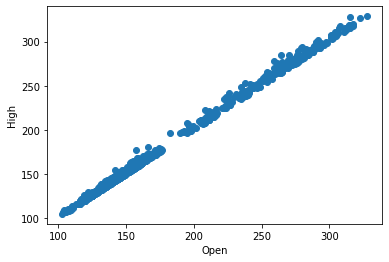

In [60]:
plt.scatter(df.Open,df['High'])
plt.xlabel('Open')
plt.ylabel('High')

In [61]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Open','High']])
y_predicted

array([2, 2, 2, ..., 1, 1, 1])

In [62]:
df['cluster']=y_predicted
df.head()

,Date,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs),Close,cluster
0,08-10-2018,208.00,222.25,206.85,216.00,4642146,10062.83,215.15,2
1,05-10-2018,217.00,218.60,205.90,210.25,3519515,7407.06,209.20,2
2,04-10-2018,223.50,227.80,216.15,217.25,1728786,3815.79,218.20,2
3,03-10-2018,230.00,237.50,225.75,226.45,1708590,3960.27,227.60,2
4,01-10-2018,234.55,234.60,221.05,230.30,1534749,3486.05,230.90,2


In [63]:
km.cluster_centers_

array([[280.67012579, 284.98207547],
       [143.22024185, 145.16771819],
       [222.642     , 226.786     ]])

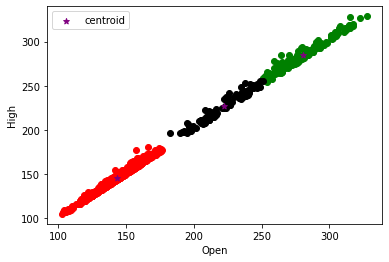

In [64]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Open,df1['High'],color='green')
plt.scatter(df2.Open,df2['High'],color='red')
plt.scatter(df3.Open,df3['High'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Open')
plt.ylabel('High')
plt.legend()

In [65]:
scaler = MinMaxScaler()

scaler.fit(df[['High']])
df['High'] = scaler.transform(df[['High']])

scaler.fit(df[['Open']])
df['Open'] = scaler.transform(df[['Open']])

In [66]:

df.head()

,Date,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs),Close,cluster
0,08-10-2018,0.467290,0.524872,206.85,216.00,4642146,10062.83,215.15,2
1,05-10-2018,0.507343,0.508588,205.90,210.25,3519515,7407.06,209.20,2
2,04-10-2018,0.536271,0.549632,216.15,217.25,1728786,3815.79,218.20,2
3,03-10-2018,0.565198,0.592907,225.75,226.45,1708590,3960.27,227.60,2
4,01-10-2018,0.585447,0.579969,221.05,230.30,1534749,3486.05,230.90,2


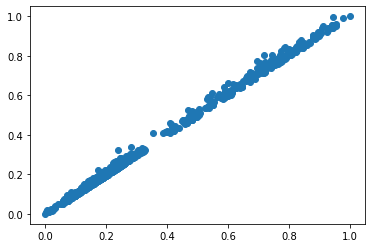

In [67]:
plt.scatter(df.Open,df['High'])

In [68]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Open','High']])
y_predicted

array([2, 2, 2, ..., 1, 1, 1])

In [69]:
df['cluster']=y_predicted
df.head()

,Date,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs),Close,cluster
0,08-10-2018,0.467290,0.524872,206.85,216.00,4642146,10062.83,215.15,2
1,05-10-2018,0.507343,0.508588,205.90,210.25,3519515,7407.06,209.20,2
2,04-10-2018,0.536271,0.549632,216.15,217.25,1728786,3815.79,218.20,2
3,03-10-2018,0.565198,0.592907,225.75,226.45,1708590,3960.27,227.60,2
4,01-10-2018,0.585447,0.579969,221.05,230.30,1534749,3486.05,230.90,2


In [70]:
km.cluster_centers_

array([[0.79069927, 0.80473824],
       [0.17899529, 0.18098469],
       [0.53245216, 0.54510819]])

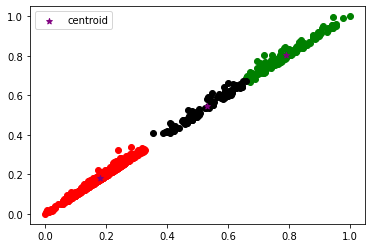

In [71]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Open,df1['High'],color='green')
plt.scatter(df2.Open,df2['High'],color='red')
plt.scatter(df3.Open,df3['High'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [72]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Open','High']])
    sse.append(km.inertia_)

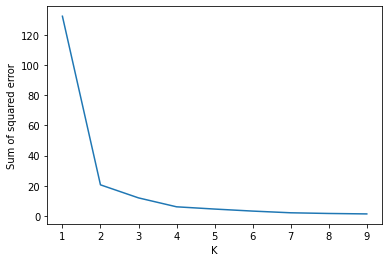

In [73]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)